In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing data

In [ ]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_df.shape

(891, 15)

In [ ]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are 177 missing values in 'age' columns while 'embarked' and 'embark_town' has 2 missing values each and 'deck' have 688 missing values.

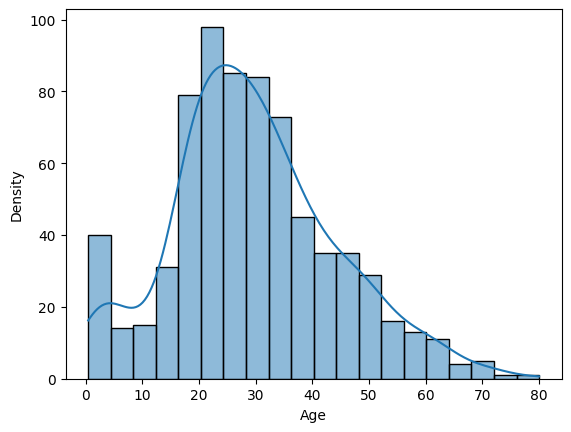

In [ ]:
plt.figure()

plt.xlabel('Age')
plt.ylabel('Density')
sns.histplot(titanic_df['age'], kde=True)
plt.show()

In [ ]:
titanic_df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

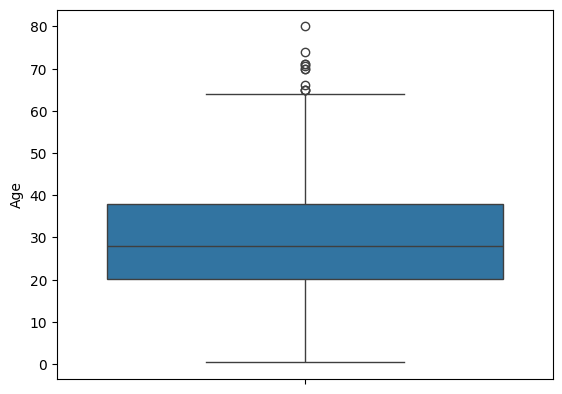

In [ ]:
plt.figure()
plt.ylabel('Age')
sns.boxplot(titanic_df['age'])
plt.show()

There are outliers in the 'age' feature.

In [ ]:
age_mean = titanic_df['age']
age_mean.shape

(891,)

In [ ]:
age_mean = age_mean.fillna(age_mean.mean())
age_mean.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64

Mean hasn't changed but standard deviation has decreased which means that the distribution is shrinked.

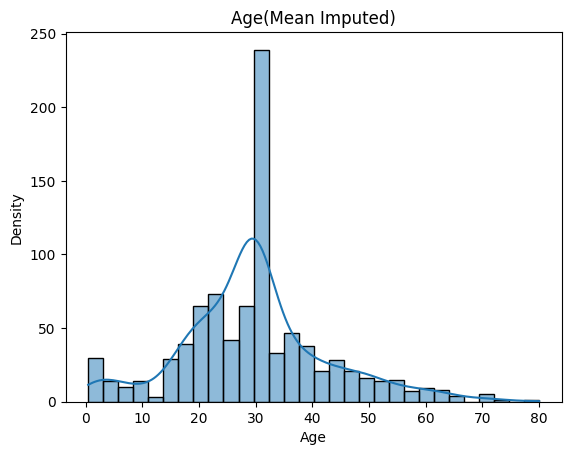

In [ ]:
plt.figure()
plt.title('Age(Mean Imputed)')
plt.xlabel('Age')
plt.ylabel('Density')
sns.histplot(age_mean, kde=True)
plt.show()

The plot also shows that distribution has shrinked while tail has extended.

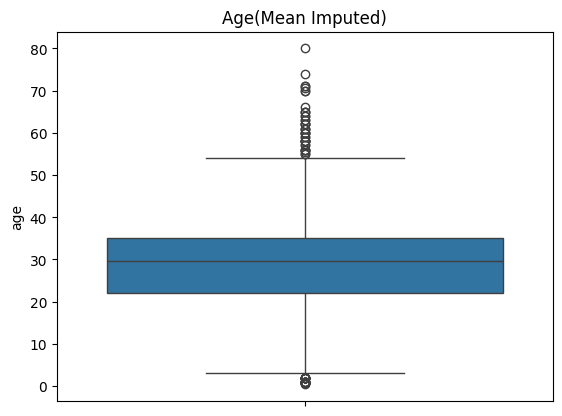

In [ ]:
plt.figure()
plt.title('Age(Mean Imputed)')
sns.boxplot(age_mean)
plt.show()

The outliers has increased.

In [ ]:
age_median = titanic_df['age']
age_median.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
age_median = age_median.fillna(age_median.median())
age_median.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

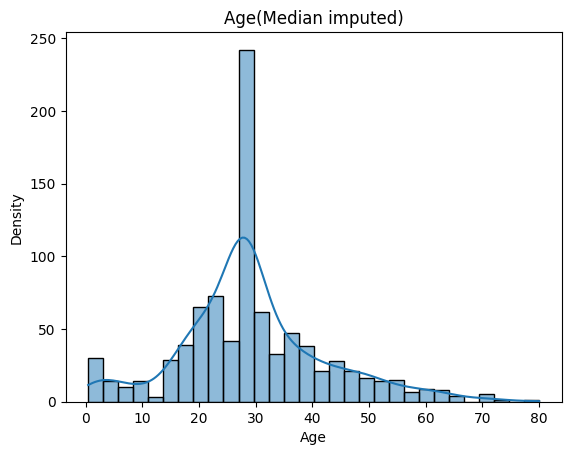

In [ ]:
plt.figure()
plt.title('Age(Median imputed)')
plt.xlabel('Age')
plt.ylabel("Density")
sns.histplot(age_median, kde=True)
plt.show()

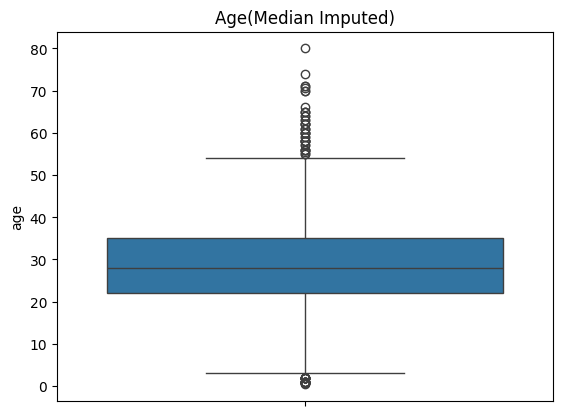

In [ ]:
plt.figure()
plt.title('Age(Median Imputed)')
sns.boxplot(age_median)
plt.show()

There isn't much difference in the data with mean/median imputation, however between two median imputation would be the good choice as the column has the outliers.

In [ ]:
titanic_df['age'] = age_median
titanic_df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic_df['embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [ ]:
titanic_df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

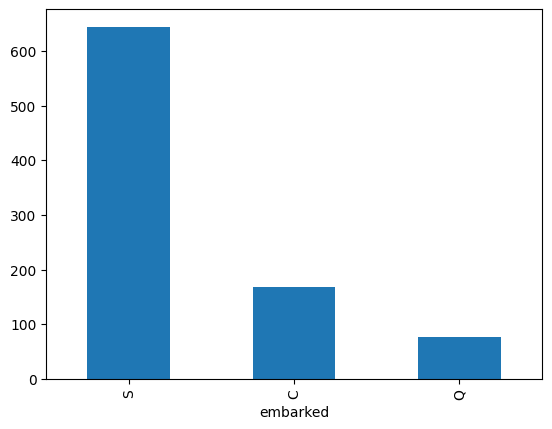

In [ ]:
plt.figure()
titanic_df['embarked'].value_counts().plot(kind='bar')
plt.show()

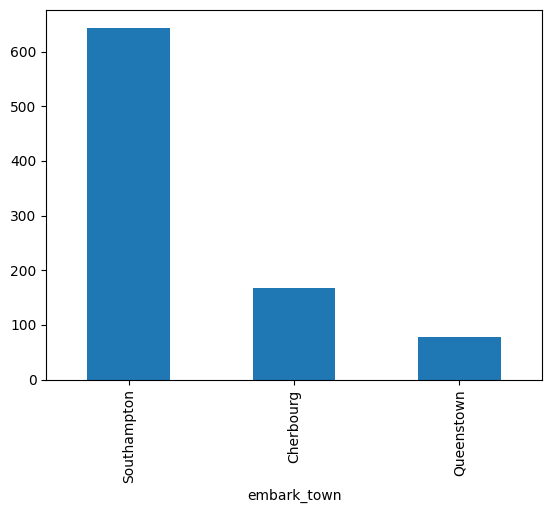

In [ ]:
plt.figure()
titanic_df['embark_town'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
titanic_df['embark_town'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [ ]:
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0])
titanic_df['embarked'] = titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0])

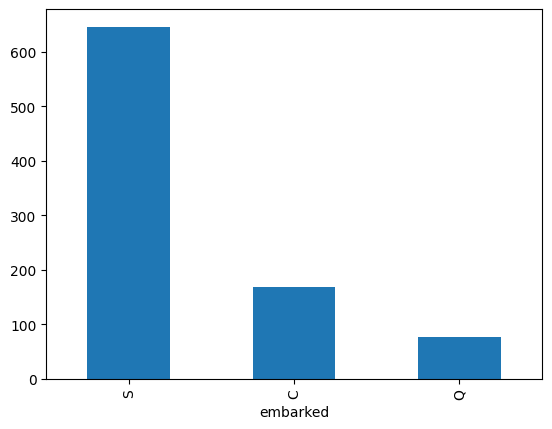

In [ ]:
plt.figure()
titanic_df['embarked'].value_counts().plot(kind='bar')
plt.show()

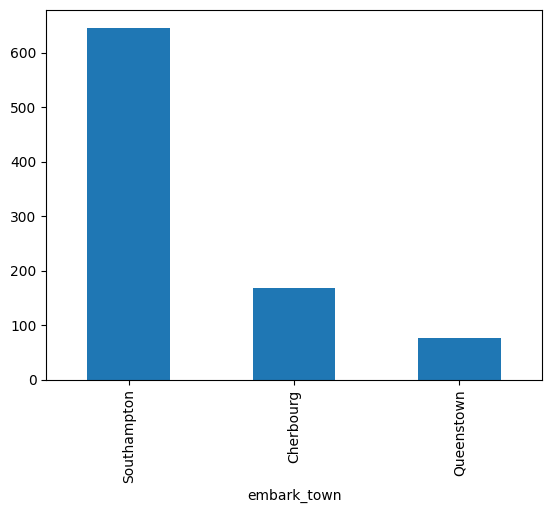

In [ ]:
plt.figure()
titanic_df['embark_town'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
titanic_df['embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: embarked, dtype: object

In [ ]:
titanic_df['embark_town'].describe()

count             891
unique              3
top       Southampton
freq              646
Name: embark_town, dtype: object

In [ ]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

Since there are too much missing values (almost 80%), it is fair to remove this column from the dataset.

In [ ]:
titanic_df.drop('deck', axis=1, inplace=True)


In [ ]:
titanic_df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Now the dataset has no missing value.

# One-hot vs label encoding

In [ ]:
from google.colab import files
files.upload()

Saving car_evaluation.csv to car_evaluation.csv


{'car_evaluation.csv': b'vhigh,vhigh,2,2,small,low,unacc\r\nvhigh,vhigh,2,2,small,med,unacc\r\nvhigh,vhigh,2,2,small,high,unacc\r\nvhigh,vhigh,2,2,med,low,unacc\r\nvhigh,vhigh,2,2,med,med,unacc\r\nvhigh,vhigh,2,2,med,high,unacc\r\nvhigh,vhigh,2,2,big,low,unacc\r\nvhigh,vhigh,2,2,big,med,unacc\r\nvhigh,vhigh,2,2,big,high,unacc\r\nvhigh,vhigh,2,4,small,low,unacc\r\nvhigh,vhigh,2,4,small,med,unacc\r\nvhigh,vhigh,2,4,small,high,unacc\r\nvhigh,vhigh,2,4,med,low,unacc\r\nvhigh,vhigh,2,4,med,med,unacc\r\nvhigh,vhigh,2,4,med,high,unacc\r\nvhigh,vhigh,2,4,big,low,unacc\r\nvhigh,vhigh,2,4,big,med,unacc\r\nvhigh,vhigh,2,4,big,high,unacc\r\nvhigh,vhigh,2,more,small,low,unacc\r\nvhigh,vhigh,2,more,small,med,unacc\r\nvhigh,vhigh,2,more,small,high,unacc\r\nvhigh,vhigh,2,more,med,low,unacc\r\nvhigh,vhigh,2,more,med,med,unacc\r\nvhigh,vhigh,2,more,med,high,unacc\r\nvhigh,vhigh,2,more,big,low,unacc\r\nvhigh,vhigh,2,more,big,med,unacc\r\nvhigh,vhigh,2,more,big,high,unacc\r\nvhigh,vhigh,3,2,small,low,unac

In [ ]:
car_evaluation_df = pd.read_csv('car_evaluation.csv')
car_evaluation_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
car_evaluation_df.nunique()


vhigh      4
vhigh.1    4
2          4
2.1        3
small      3
low        3
unacc      4
dtype: int64

There are 3 to 4 unique values in each feature, so whole dataset is based on categorical variables.

In [ ]:
car_evaluation_df = car_evaluation_df.apply(LabelEncoder().fit_transform)
car_evaluation_df.head(30)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
5,3,3,0,0,0,1,2
6,3,3,0,0,0,2,2
7,3,3,0,0,0,0,2
8,3,3,0,1,2,1,2
9,3,3,0,1,2,2,2


In [ ]:


ohe = OneHotEncoder(sparse=False, drop='first')
ohe_data = ohe.fit_transform(car_evaluation_df)
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(car_evaluation_df.columns))
ohe_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,vhigh_1,vhigh_2,vhigh_3,vhigh.1_1,vhigh.1_2,vhigh.1_3,2_1,2_2,2_3,2.1_1,2.1_2,small_1,small_2,low_1,low_2,unacc_1,unacc_2,unacc_3
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Label Encoder has assigned a numerical value for each category and applied it on the dataset. In this way it converted the whole dataset into numerics.
whereas, One Hot Encoder looked for each categroy against a value and assigned '1' to that category if it is found and '0' to the value which is not found in that particular row. In this way it created new column for each category and looked whether it is present in the base value and hence assigned '1' to it and if not found assigned '0' to it. In this way it converted the dataset into numerics.

# Scaling Features

In [ ]:
from google.colab import files
files.upload()

Saving winequality-red.csv to winequality-red.csv


{'winequality-red.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5\n7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5\

In [ ]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.shape

(1599, 12)

In [ ]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
wine_data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


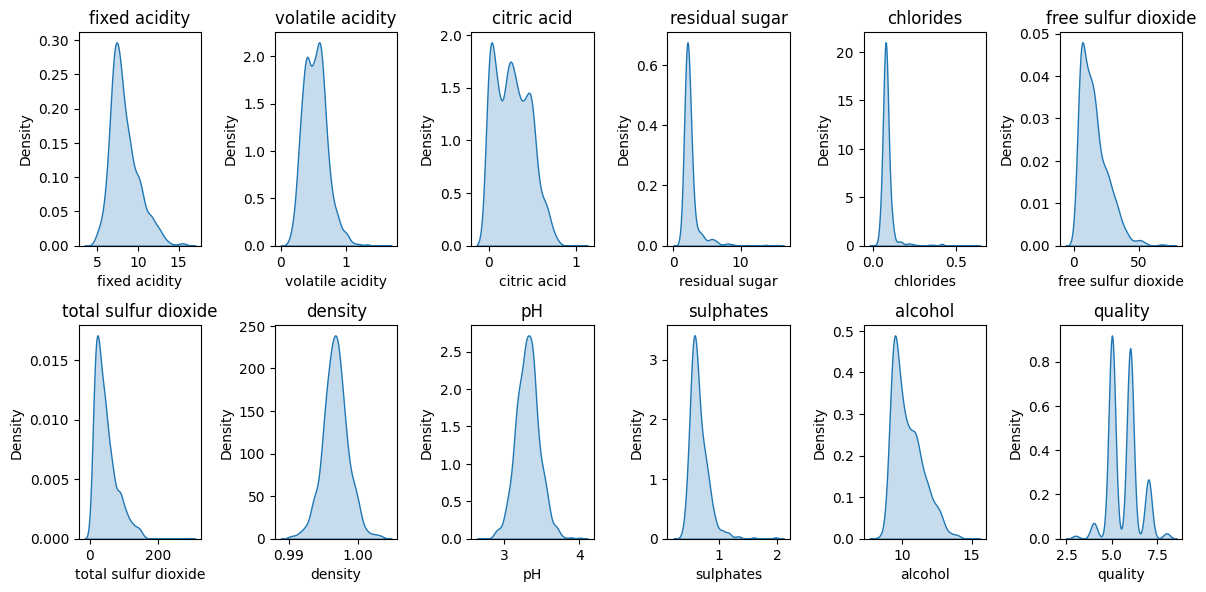

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(12,6))
axes = axes.flatten()
for a, column in enumerate(wine_data.columns):
  sns.kdeplot(wine_data[column],ax=axes[a], fill=True)
  axes[a].set_title(column)
plt.tight_layout(pad=1.0)

plt.show()

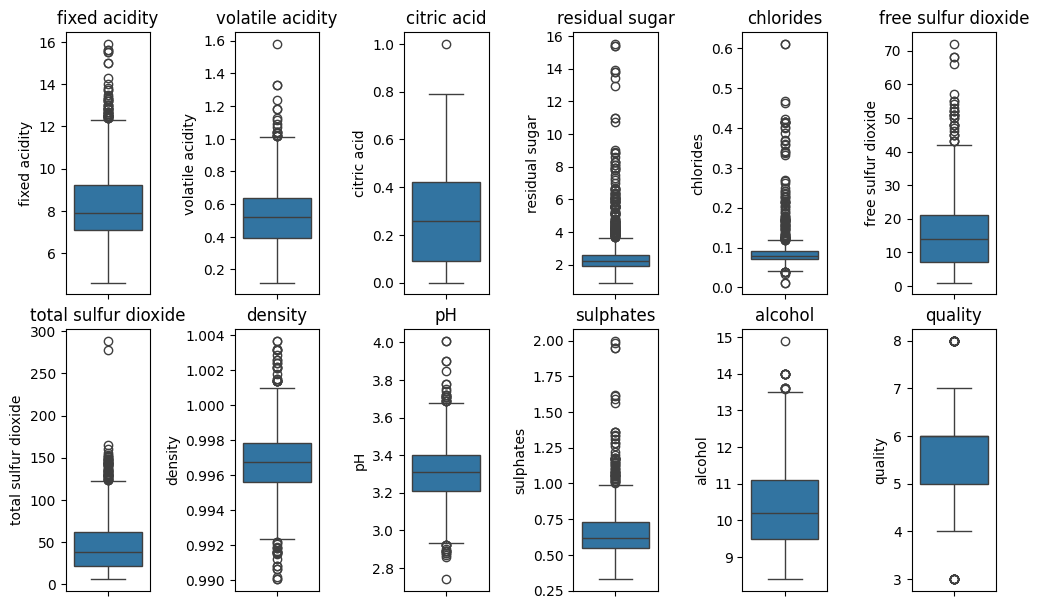

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(wine_data.columns):
  sns.boxplot(wine_data[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

Above plots show that 'citric acid', 'density', 'ph', 'alcohol' and 'quality' almost follow normal distribution, so these don't need normalization.
Other features can benefit from scaling(normalization).

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mnmx_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [ ]:
wine_data_mx = wine_data.copy()
cols_to_normalize = ['fixed acidity', 'volatile acidity',  'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                     'sulphates']
wine_data_mx[cols_to_normalize] = mnmx_scaler.fit_transform(wine_data_mx[cols_to_normalize])

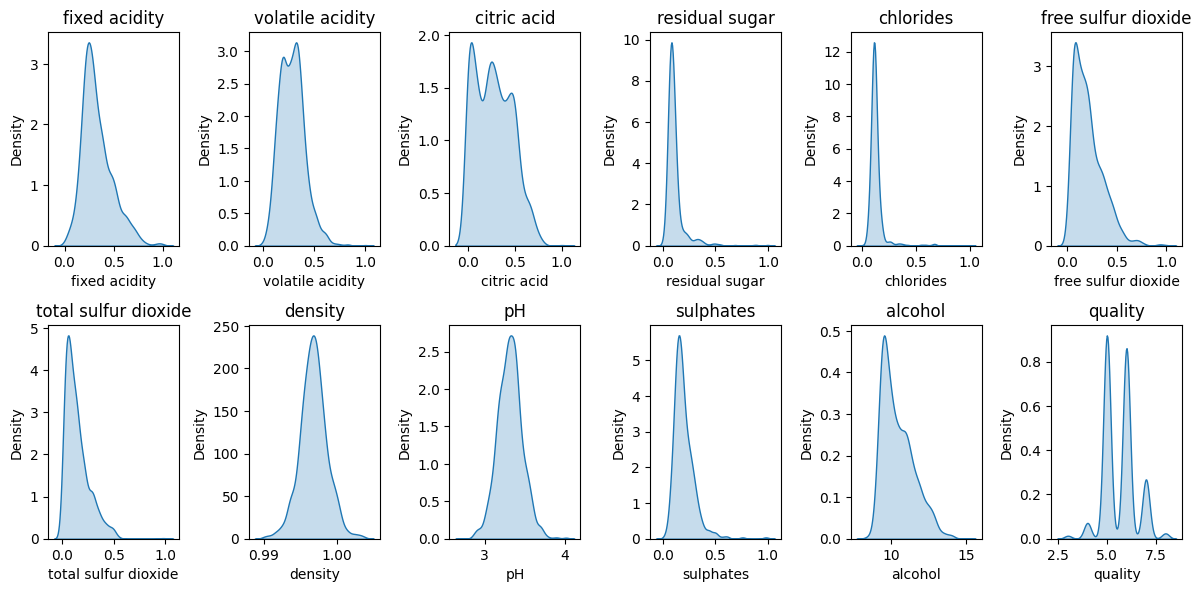

In [ ]:

fig, axes = plt.subplots(2, 6, figsize=(12,6))
axes = axes.flatten()
for a, column in enumerate(wine_data_mx.columns):
  sns.kdeplot(wine_data_mx[column],ax=axes[a], fill=True)
  axes[a].set_title(column)
plt.tight_layout(pad=1.0)

plt.show()

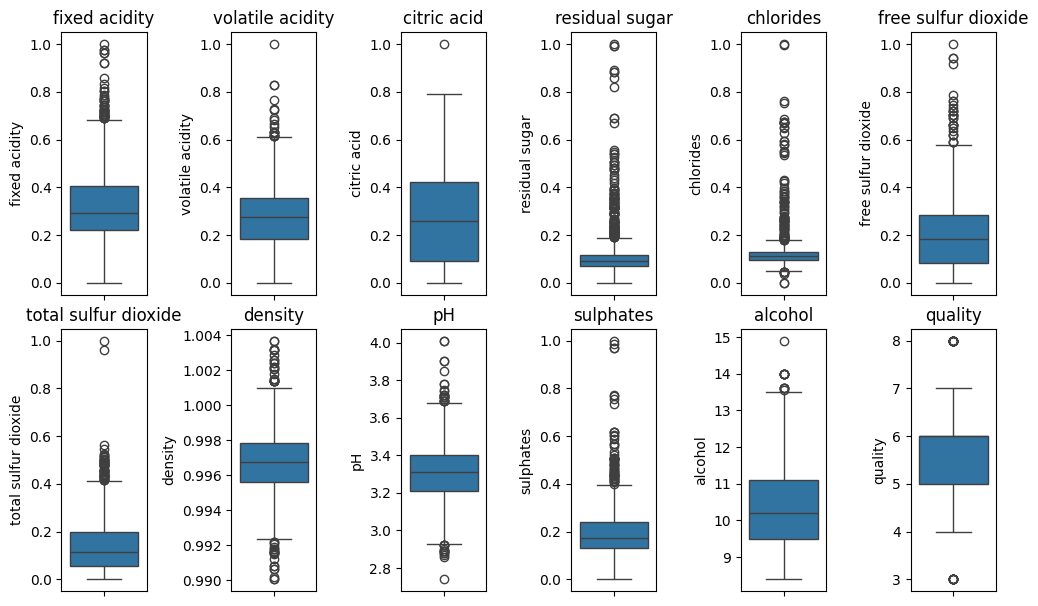

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(wine_data_mx.columns):
  sns.boxplot(wine_data_mx[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
wine_data_mx.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.996747,3.311113,0.196496,10.422983,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.001887,0.154386,0.101501,1.065668,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990070,2.740000,0.000000,8.400000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.995600,3.210000,0.131737,9.500000,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.996750,3.310000,0.173653,10.200000,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.997835,3.400000,0.239521,11.100000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.003690,4.010000,1.000000,14.900000,8.000000


The data now lies between 0 and 1 but distribution isn't changed much, and there are still much outliers in the data.

In [ ]:
wine_data_std = wine_data.copy()

wine_data_std[cols_to_normalize] = standard_scaler.fit_transform(wine_data_std[cols_to_normalize])

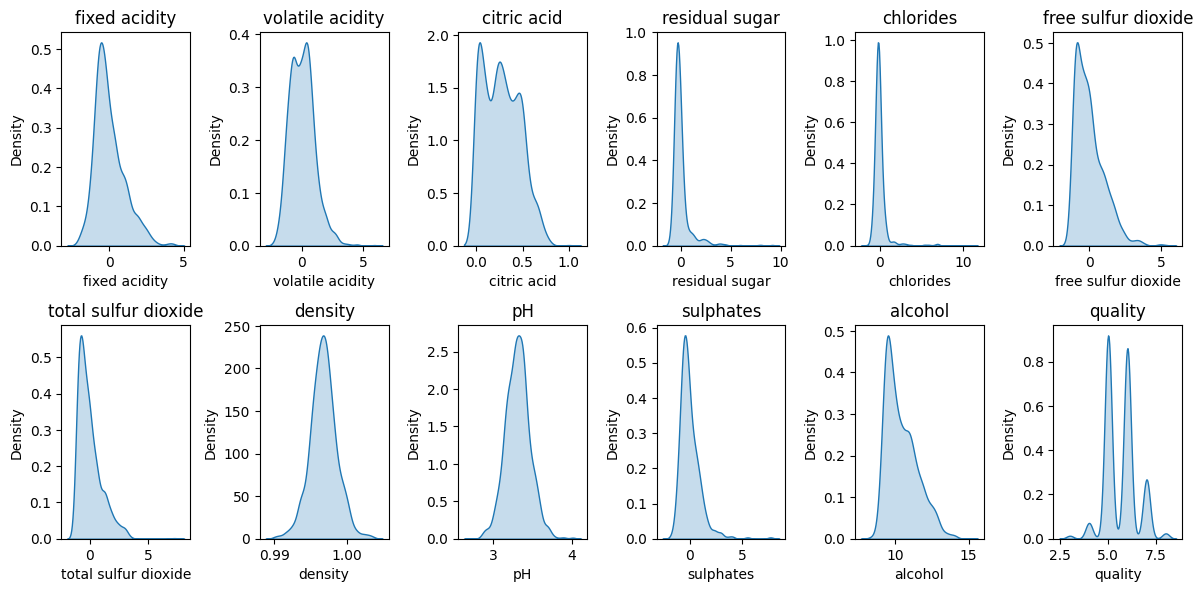

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(12,6))
axes = axes.flatten()
for a, column in enumerate(wine_data_std.columns):
  sns.kdeplot(wine_data_std[column],ax=axes[a], fill=True)
  axes[a].set_title(column)
plt.tight_layout(pad=1.0)

plt.show()

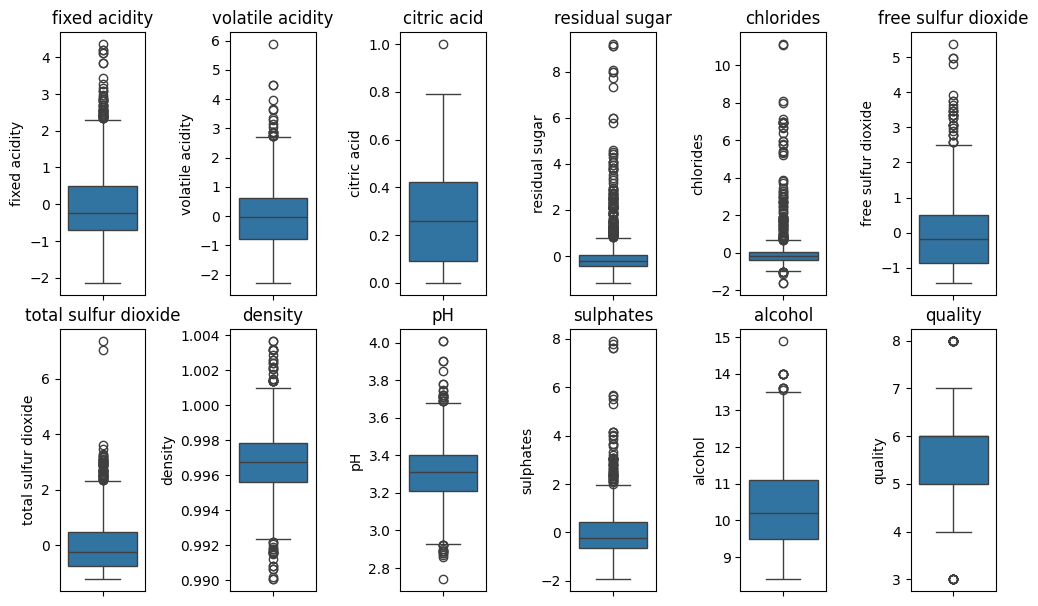

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(wine_data_std.columns):
  sns.boxplot(wine_data_std[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
wine_data_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1.599000e+03,1599.000000,1599.000000
mean,3.554936e-16,1.733031e-16,0.270976,-1.244227e-16,2.132961e-16,-6.221137e-17,4.443669e-17,0.996747,3.311113,6.754377e-16,10.422983,5.636023
std,1.000313e+00,1.000313e+00,0.194801,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.001887,0.154386,1.000313e+00,1.065668,0.807569
min,-2.137045e+00,-2.278280e+00,0.000000,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,0.990070,2.740000,-1.936507e+00,8.400000,3.000000
25%,-7.007187e-01,-7.699311e-01,0.090000,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,0.995600,3.210000,-6.382196e-01,9.500000,5.000000
50%,-2.410944e-01,-4.368911e-02,0.260000,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,0.996750,3.310000,-2.251281e-01,10.200000,6.000000
75%,5.057952e-01,6.266881e-01,0.420000,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,0.997835,3.400000,4.240158e-01,11.100000,6.000000
max,4.355149e+00,5.877976e+00,1.000000,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,1.003690,4.010000,7.918677e+00,14.900000,8.000000


The range has change, but the data still have the outliers.

# Handling Outliers

In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5.4509

In [ ]:
boston_data = pd.read_csv('BostonHousing.csv')
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


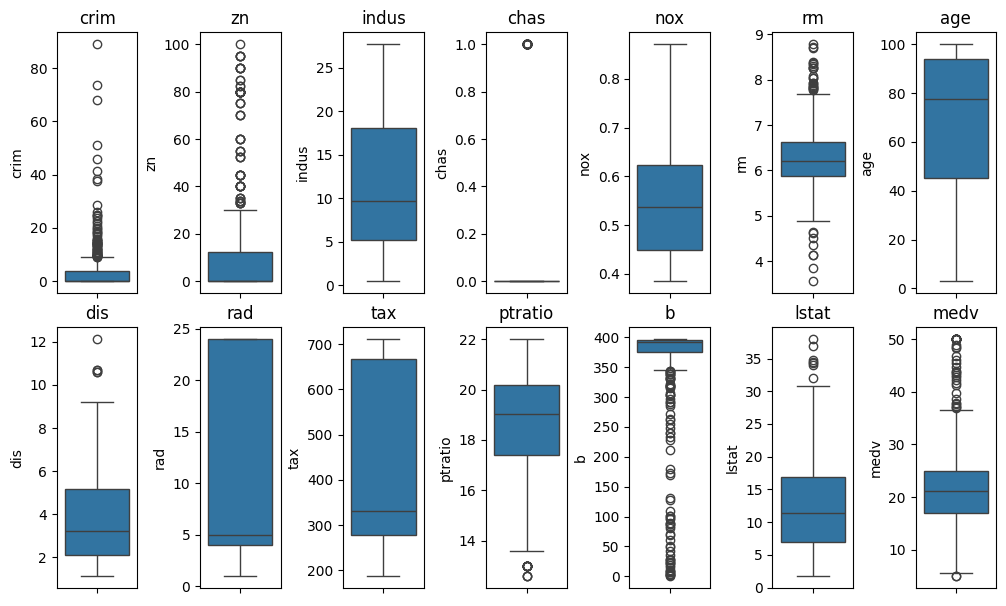

In [ ]:
fig, axes = plt.subplots(2, 7, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(boston_data.columns):
  sns.boxplot(boston_data[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(boston_data))
outliers = np.where(z_score > 3)
print(f"{len(outliers[0])} Outliers in the dataset")

92 Outliers in the dataset


In [ ]:
boston_filtered = boston_data[(z_score < 3)]
boston_filtered.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,NaN,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


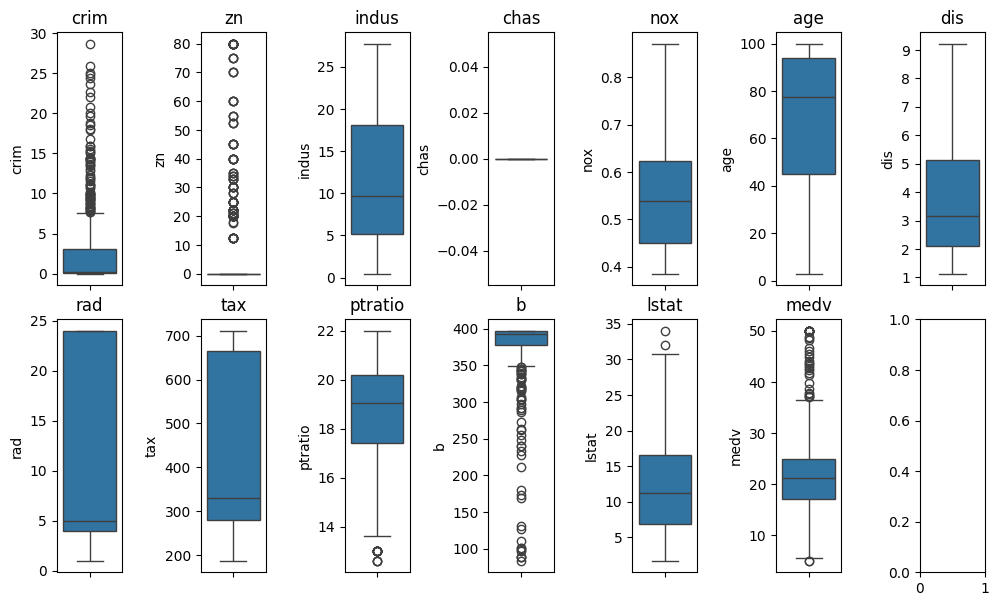

In [ ]:
x = boston_filtered.drop('rm', axis=1)
fig, axes = plt.subplots(2, 7, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(x.columns):
  sns.boxplot(x[column], ax=axes[i])
  axes[i].set_title(column)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
Q1 = boston_data.quantile(0.25)
Q3 = boston_data.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((boston_data < (Q1 - 1.5 * IQR)) | (boston_data > (Q3 + 1.5 * IQR))).sum()
print(f'Number of outliers detected by IQR: {outliers_iqr.sum()}')

Number of outliers detected by IQR: 343


# KNN and MICE Imputer

In [ ]:
from google.colab import files
files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


{'retail_sales_dataset.csv': b'Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount\r\n1,2023-11-24,CUST001,Male,34,Beauty,3,50,150\r\n2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000\r\n3,2023-01-13,CUST003,Male,50,Electronics,1,30,30\r\n4,2023-05-21,CUST004,Male,37,Clothing,1,500,500\r\n5,2023-05-06,CUST005,Male,30,Beauty,2,50,100\r\n6,2023-04-25,CUST006,Female,45,Beauty,1,30,30\r\n7,2023-03-13,CUST007,Male,46,Clothing,2,25,50\r\n8,2023-02-22,CUST008,Male,30,Electronics,4,25,100\r\n9,2023-12-13,CUST009,Male,63,Electronics,2,300,600\r\n10,2023-10-07,CUST010,Female,52,Clothing,4,50,200\r\n11,2023-02-14,CUST011,Male,23,Clothing,2,50,100\r\n12,2023-10-30,CUST012,Male,35,Beauty,3,25,75\r\n13,2023-08-05,CUST013,Male,22,Electronics,3,500,1500\r\n14,2023-01-17,CUST014,Male,64,Clothing,4,30,120\r\n15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000\r\n16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500\r\n17,2023-04-22,CUST017,Female,27,Clothing,

In [ ]:
retail_data = pd.read_csv("retail_sales_dataset.csv")
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
retail_data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
n_nulls = 10
total_values = retail_data.size
null_indices = np.random.choice(total_values, n_nulls, replace=False)
row_indices, col_indices = np.unravel_index(null_indices, retail_data.shape)
retail_data.iloc[row_indices, col_indices] = np.nan

In [ ]:
retail_data.isna().sum()

Transaction ID      10
Date                10
Customer ID         10
Gender               0
Age                 10
Product Category    10
Quantity             0
Price per Unit      10
Total Amount        10
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
retail_data_cp = retail_data.copy()
retail_data_cp.drop("Date", axis=1, inplace=True)
retail_data_cp['Product Category'] = retail_data_cp['Product Category'].fillna('Electronics')
retail_data_cp['Customer ID'] = retail_data_cp['Customer ID'].fillna('CUST002')

knn_imputer = KNNImputer(n_neighbors=5)
numerical_columns = retail_data_cp.select_dtypes(include=[np.number]).columns
imputed_data = knn_imputer.fit_transform(retail_data_cp[numerical_columns])


retail_data_imputed_numerical = pd.DataFrame(imputed_data, columns=numerical_columns)

non_numerical_columns = retail_data_cp.select_dtypes(exclude=[np.number]).columns
retail_data_knn_imputed = pd.concat([retail_data_imputed_numerical, retail_data_cp[non_numerical_columns]], axis=1)

# Ensure the columns are in the original order
retail_data_knn_imputed = retail_data_knn_imputed[retail_data_cp.columns]
retail_data_knn_imputed.head()



,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1.0,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2.0,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3.0,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,393.4,CUST002,Male,52.0,Electronics,1.0,180.0,180.0
4,5.0,CUST005,Male,30.0,Beauty,2.0,50.0,100.0


In [ ]:
retail_data_knn_imputed.isna().sum()

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
mice_imputer = IterativeImputer(random_state=0)
retail_data_mice_cp = retail_data.copy()

retail_data_mice_cp['Product Category'] = retail_data_mice_cp['Product Category'].fillna('Electronics')
retail_data_mice_cp['Customer ID'] = retail_data_mice_cp['Customer ID'].fillna('CUST002')
numerical_columns = retail_data_mice_cp.select_dtypes(include=[np.number]).columns
imputed_data = knn_imputer.fit_transform(retail_data_mice_cp[numerical_columns])


retail_data_imputed_numerical = pd.DataFrame(imputed_data, columns=numerical_columns)

non_numerical_columns = retail_data_mice_cp.select_dtypes(exclude=[np.number]).columns
retail_data_knn_imputed = pd.concat([retail_data_imputed_numerical, retail_data_mice_cp[non_numerical_columns]], axis=1)

retail_data_mice_imputed = retail_data_knn_imputed[retail_data_cp.columns]
retail_data_mice_imputed.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1.0,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2.0,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3.0,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,393.4,CUST002,Male,52.0,Electronics,1.0,180.0,180.0
4,5.0,CUST005,Male,30.0,Beauty,2.0,50.0,100.0


In [ ]:
retail_data_mice_imputed.isna().sum()

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Creating new features

In [ ]:
from google.colab import files
files.upload()

Saving heart_disease_data.csv to heart_disease_data.csv


{'heart_disease_data.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42

In [ ]:
heart_data = pd.read_csv('heart_disease_data.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
def age_group(x):
  if x > 60:
    age_group = "Old"
  elif x <= 60 and x >= 40:
    age_group = "Middle age"
  else:
    age_group = "Young"
  return age_group

heart_data.insert(1, 'age group', heart_data['age'].apply(age_group))

In [ ]:
heart_data.head()

,age,age group,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Old,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Young,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Middle age,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Middle age,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Middle age,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
def chol_level(y):
  if y > 300:
    chol_level = "High"
  elif y >= 200 and y <= 300:
    chol_level = "Moderate"
  else:
    chol_level = "Low"
  return chol_level

heart_data.insert(heart_data.columns.get_loc('chol') + 1, 'Cholestrol level', heart_data['chol'].apply(chol_level))

In [ ]:
heart_data.head()

,age,age group,sex,cp,trestbps,chol,Cholestrol level,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Old,1,3,145,233,Moderate,1,0,150,0,2.3,0,0,1,1
1,37,Young,1,2,130,250,Moderate,0,1,187,0,3.5,0,0,2,1
2,41,Middle age,0,1,130,204,Moderate,0,0,172,0,1.4,2,0,2,1
3,56,Middle age,1,1,120,236,Moderate,0,1,178,0,0.8,2,0,2,1
4,57,Middle age,0,0,120,354,High,0,1,163,1,0.6,2,0,2,1


# Transforming Variables

In [ ]:
from google.colab import files
files.upload()

Saving hour.csv to hour.csv


{'hour.csv': b'instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt\r\n1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16\r\n2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40\r\n3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32\r\n4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13\r\n5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1\r\n6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1\r\n7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2\r\n8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3\r\n9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8\r\n10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14\r\n11,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.3939,0.76,0.2537,12,24,36\r\n12,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,26,30,56\r\n13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,29,55,84\r\n14,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.4545,0.72,0.2985,47,47,94\r\n15,2011-01-01,1

In [ ]:
bike_data = pd.read_csv('hour.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


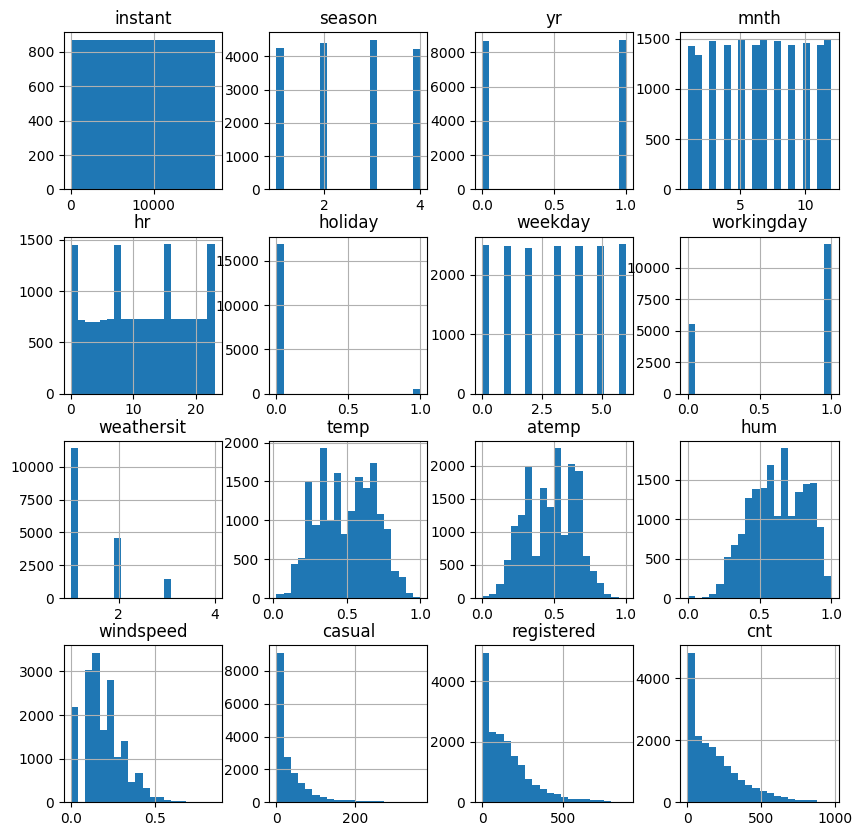

In [ ]:
bike_data.hist(figsize=(10, 10), bins=20)
plt.show()

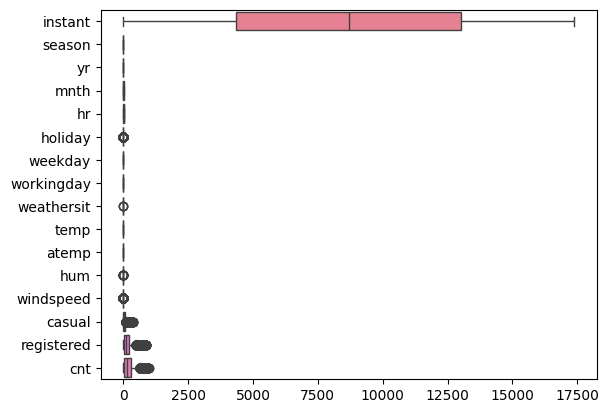

In [ ]:

plt.figure()
sns.boxplot(bike_data, orient='h')
plt.show()

In [ ]:
numeric_bike_data = bike_data.select_dtypes(include=[np.number])
numeric_bike_data.skew()

instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

Above calculations show that 'hm', 'windspeed', 'casual', 'registered' and 'cnt' are skewed.

In [ ]:
cols_to_transform = ['hum','windspeed', 'casual', 'registered', 'cnt']
log_df = bike_data[['hum','windspeed', 'casual', 'registered', 'cnt']]
for col in cols_to_transform:
  log_df[col] = np.log(log_df[col] + 1)


<ipython-input-85-a6b38df24b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[col] = np.log(log_df[col] + 1)
<ipython-input-85-a6b38df24b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df[col] = np.log(log_df[col] + 1)
<ipython-input-85-a6b38df24b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

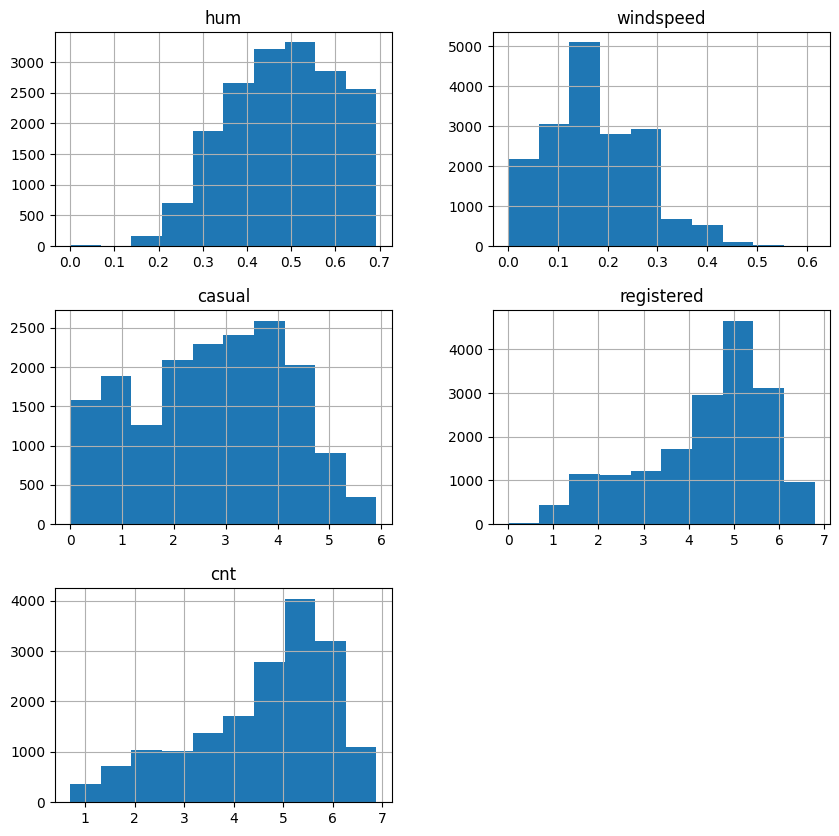

In [ ]:
log_df.hist(figsize=(10, 10))
plt.show()

In [ ]:
log_df.skew()

hum          -0.338441
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

In [ ]:
sqrt_df = bike_data[['hum','windspeed', 'casual', 'registered', 'cnt']]
for col in cols_to_transform:
  sqrt_df[col] = np.sqrt(np.abs(log_df[col]))

<ipython-input-88-739544792795>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df[col] = np.sqrt(np.abs(log_df[col]))


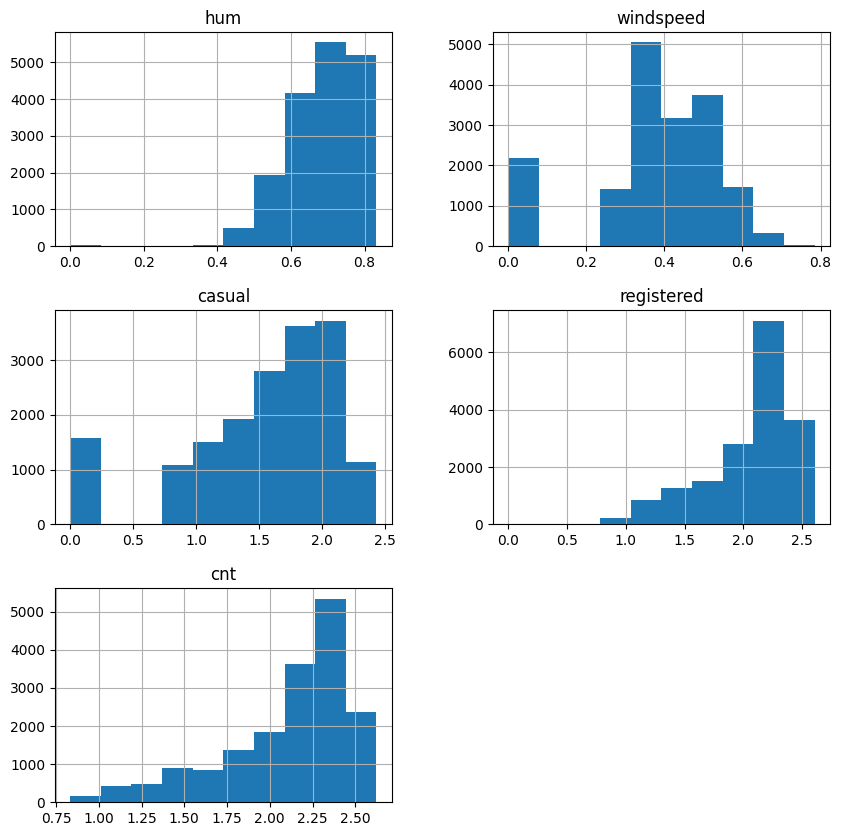

In [ ]:
sqrt_df.hist(figsize=(10, 10))
plt.show()

In [ ]:
sqrt_df.skew()

hum          -0.971606
windspeed    -1.081822
casual       -1.206360
registered   -1.328917
cnt          -1.217670
dtype: float64

In [ ]:
from scipy.stats import boxcox
boxcox_df = bike_data[['hum','windspeed', 'casual', 'registered', 'cnt']]
for col in cols_to_transform:
  boxcox_df[col], _ = boxcox(np.abs(boxcox_df[col]) + 1)

<ipython-input-91-323e20c10d99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxcox_df[col], _ = boxcox(np.abs(boxcox_df[col]) + 1)
<ipython-input-91-323e20c10d99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boxcox_df[col], _ = boxcox(np.abs(boxcox_df[col]) + 1)
<ipython-input-91-323e20c10d99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

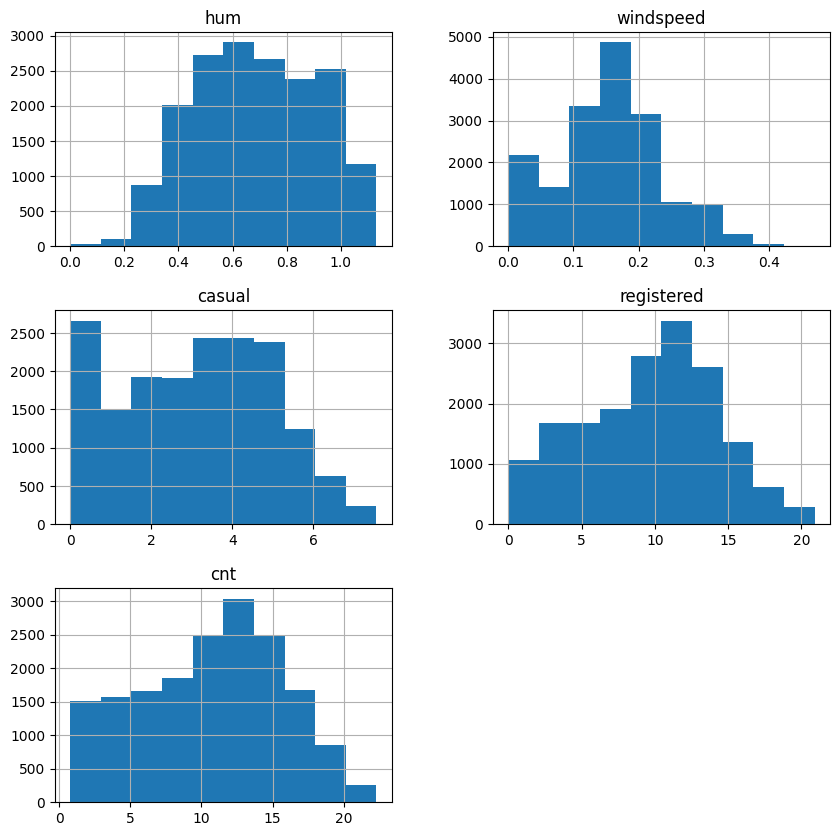

In [ ]:

boxcox_df.hist(figsize=(10, 10))
plt.show()

In [ ]:
boxcox_df.skew()

hum          -0.045270
windspeed     0.007219
casual       -0.036137
registered   -0.117668
cnt          -0.137397
dtype: float64

Boxcox transformation showed best results among the transformations applied.

# Feature Selection

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


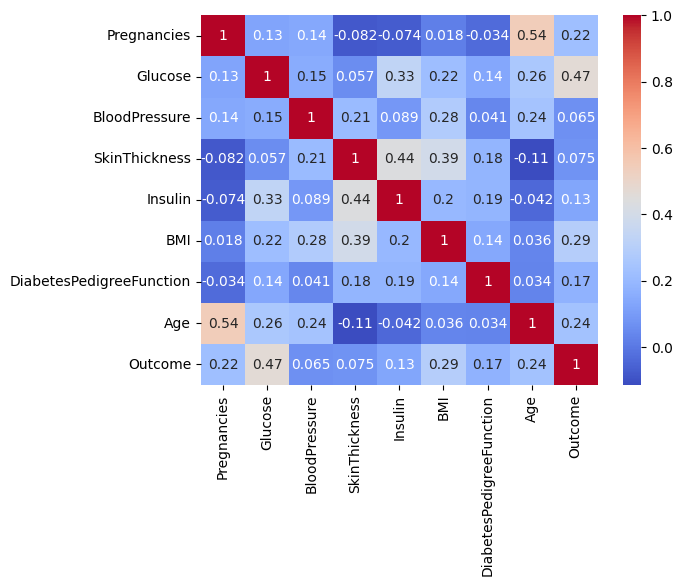

In [ ]:
sns.heatmap(diabetes_data.corr(), cmap='coolwarm', annot=True)
plt.show()

If 'outcome' is considered target, then 'Glucose' level is an important feature among others as it is very positively related with the target variable than the others.
On the other hand, 'DiabetesPedigreeFunction' and 'Age' are also important features as these are most negatively related with the target than the others.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
mutual_info = mutual_info_regression(X, y)
mutual_info_df = pd.DataFrame({'Features': X.columns, 'Relationship with the Outcome': mutual_info})
mutual_info_df.sort_values(by='Relationship with the Outcome', ascending=False)

mutual_info_df

,Features,Relationship with the Outcome
0,Pregnancies,0.035764
1,Glucose,0.113506
2,BloodPressure,0.017440
3,SkinThickness,0.044067
4,Insulin,0.015183
5,BMI,0.102074
6,DiabetesPedigreeFunction,0.010142
7,Age,0.067156


According to the mutaual information, 'BMI' and 'Age' are strongly related with Outcome.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model)
rfe.fit(X, y)
rfe_ranking = rfe.ranking_
rfe_df = pd.DataFrame({'Feature': X.columns, 'Relationship with the Outcome': rfe_ranking})
rfe_df.sort_values(by='Relationship with the Outcome')
rfe_df

,Feature,Relationship with the Outcome
0,Pregnancies,1
1,Glucose,1
2,BloodPressure,3
3,SkinThickness,5
4,Insulin,4
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,2


According to RFE, 'Pregnancies', 'Glucose', 'BMI' and 'DiabetesPedigreeFunction' are more related to the outcome.

# Handling Imbalanced Data

In [2]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
creditcard_data = pd.read_csv('creditcard.csv')
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
X = creditcard_data.drop("Class", axis=1)
y = creditcard_data["Class"]
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)
X_smote_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [7]:
y_smote_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import ADASYN
adasyn  = ADASYN()
X_adasin_resampled, y_adasyn_resampled = adasyn.fit_resample(X, y)
X_adasin_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
y_adasyn_resampled.value_counts()

Class
0    284315
1    284298
Name: count, dtype: int64

In [ ]:
y_adasyn_resampled.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler  = RandomUnderSampler()
X_under_sampled, y_under_sampled = undersampler.fit_resample(X, y)
X_under_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,121465.0,-2.233241,0.778847,1.800158,-0.043346,-0.792062,0.658907,-0.289372,-0.905557,-0.144229,...,-0.805516,1.598154,-0.297757,-0.360338,-0.022718,0.485693,-0.714799,0.269319,-0.214793,144.00
1,126749.0,1.975734,-2.087899,-0.080424,-1.555094,-2.025276,0.086620,-1.856364,0.097232,-0.663123,...,-0.094132,0.173077,0.629995,0.196184,0.589496,-0.604248,-0.154359,0.044278,0.003925,152.65
2,22346.0,1.229262,-0.236001,1.050770,-0.517223,-1.103929,-0.763099,-0.618512,-0.143782,3.032723,...,-0.116334,-0.150750,0.061535,-0.039142,0.362130,0.489192,-0.727959,0.067988,0.031801,11.85
3,117024.0,0.066009,0.375637,1.193799,-0.426605,-0.296194,-0.520911,0.214064,0.039185,0.824230,...,-0.205373,0.266530,0.937087,-0.127858,0.054878,-0.361707,-0.289036,0.112462,0.057818,9.99
4,138616.0,0.507642,0.537737,0.606244,0.944001,-0.358830,1.186604,-1.093009,-1.441123,0.046914,...,-0.004794,1.761621,0.427872,-0.232507,-0.932468,0.500915,1.218310,0.268904,0.245552,6.47


In [ ]:
y_under_sampled.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

#  Combining Multiple Datasets

In [11]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [13]:
import zipfile
with zipfile.ZipFile('Movie Lens Dataset.zip', 'r') as zip:
    zip.extractall()

In [15]:
ratings = pd.read_csv('./Movie Lens Dataset/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies = pd.read_csv('./Movie Lens Dataset/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
links = pd.read_csv('./Movie Lens Dataset/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [18]:
tags = pd.read_csv('./Movie Lens Dataset/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [19]:
ratings_movies = pd.merge(ratings, movies, on="movieId")
ratings_movies_links = pd.merge(ratings_movies, links, on="movieId")
merged_df = pd.merge(ratings_movies_links, tags, on=["movieId", "userId"])
merged_df.head()

,userId,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,tag,timestamp_y
0,336,1,4.0,1122227329,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1139045764
1,474,1,4.0,978575760,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,pixar,1137206825
2,567,1,3.5,1525286001,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,fun,1525286013
3,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,moldy,1143424860
4,289,3,2.5,1143424657,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,old,1143424860


In [20]:
merged_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp_x', 'title', 'genres',
       'imdbId', 'tmdbId', 'tag', 'timestamp_y'],
      dtype='object')

In [21]:
merged_df.isna().sum()

userId         0
movieId        0
rating         0
timestamp_x    0
title          0
genres         0
imdbId         0
tmdbId         0
tag            0
timestamp_y    0
dtype: int64